# Player Satisfaction Project Part 3: Tokenization And Word Clouds

### This is the third part of the player satisfaction project. This section looks at the tokenization and processing of user submitted text in response to the open ended prompt asking for balance changes/suggestions. 

Tokenization is the Process of taking words or phrases and dividing them into smaller parts for processing. It is important to note that tokens are not individual words, they instead are chunks of words, think about analyzing the following sentences only examining each word. "The Trophy Would Not Fit Into The Case Because It Was Too Small."
and "The Trophy Would Not Fit Into The Case Because It Was Too Big." notice how changing the word from big to small changes what object the pronoun "it" refers to in the sentence. The meaning of the word it is derived from the adjective. This is an example of why processing language needs to be done in chunks instead of by individual words.

In [4]:
#import Statements
import spacy
import pandas as pd
from nltk.probability import FreqDist
from wordcloud import WordCloud
import matplotlib.pyplot as plt

For this project I am using the spacy Natural Language Processing(NLP) library. 

In [5]:
#Load the english language model
nlp = spacy.load('en_core_web_sm')

#load the data
data = pd.read_csv(r'../LolDataCleaned.csv')

We will once again examine the open changes response column. We will iterate through each of the data frame rows and tokenize each response, adding the tokens to a list so that we can create a word cloud of them later. We'll also use a frequency distribution plotting function to identify the most used tokens

In [6]:
tokens = [] #Holds the tokens
for response in data['OpenChanges']: #Create tokens from the responses
    if isinstance(response, str):
        doc = nlp(response)
        tokens.extend([token.lemma_ for token in doc if not token.is_stop and not token.is_punct and not token.is_space])

freq_dist = FreqDist(tokens) #Identify the frequency of each token
common_words = freq_dist.most_common(250) #Get the 150 most common words


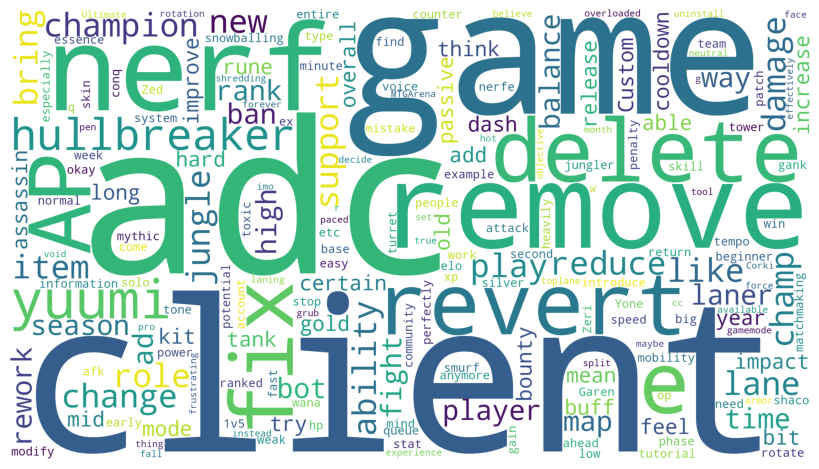

In [7]:
#create a word cloud
#Word Cloud
from spacy.lang.en.stop_words import STOP_WORDS #grab some stop words so that we can leave out meaningless words
wordcloud_string = ' '.join([word for word, _ in common_words])

wordcloud = WordCloud(width = 2560, height = 1440, 
                background_color ='white', 
                stopwords = STOP_WORDS, 
                min_font_size = 12).generate(wordcloud_string)

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show()